
![Status](https://img.shields.io/static/v1.svg?label=Status&message=Developing&color=yellow)


<p align="center">
  <img src="https://github.com/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/colab_data/chrombert_logo_fin.png?raw=true" alt="ChromBERT logo" width="200">
</p>

# ChromBERT: Uncovering Chromatin State Motifs in the Human Genome Using a BERT-based Approach


- Github repository: [![Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=Github&color=olive)](https://github.com/caocao0525/ChromBERT)<br>
- Tutorial Notebook: [![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/ChromBERT_on_Colab.ipynb)

<br>



---
📖 **Citation (Preprint)**:<br>

- Seohyun Lee, Che Lin, Chien-Yu Chen, and Ryuichiro Nakato* (2024) ChromBERT: Uncovering Chromatin State Motifs in the Human Genome Using a BERT-based Approach, *bioRxiv* [![DOI:10.1101/2024.07.25.605219](http://img.shields.io/badge/DOI-10.1101/2024.07.25.605219-008080.svg)](https://doi.org/10.1101/2024.07.25.605219)
<!--**DOI:** [10.1101/2024.07.25.605219](https://doi.org/10.1101/2024.07.25.605219) -->

---

<br>

Chromatin states are crucial for gene regulation and cellular identity, defined by unique histone modifications. This tutorial introduces **ChromBERT**, a BERT-based model tailored to analyze chromatin state annotation sequences (Fig. 1). **ChromBERT** efficiently processes these sequences to identify patterns during its pretraining stage, learning general chromatin state patterns across the genome. During fine-tuning, **ChromBERT** distinguishes between promoters associated with high and low gene expression based on their distinctive patterns.

Additionally, **ChromBERT** allows users to extract motif-like chromatin state patterns from specific regions, such as highly expressed promoters, utilizing the attention matrix from BERT training. The tool also incorporates motif clustering with Dynamic Time Warping (DTW) to enhance understanding of genomic regions, potentially aiding in the discovery of novel biological functions and enriching our insights into chromatin dynamics.

<br>

<!-- <figure>
<img src="https://drive.google.com/uc?export=view&id=12OK_ZjwcjRNIlsPItRbhXy-kKGfEKqsh" alt="ChromBERT Overview" width="800"/>
<figcaption>Fig.1 The Overview of ChromBERT</figcaption>
</figure> -->

<figure>
<img src="https://github.com/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/colab_data/abs_fig.png?raw=true" alt="ChromBERT Overview" width="800"/>
<figcaption>Fig. 1: The Overview of ChromBERT</figcaption>
</figure>


<br><br>



---
<br>

# Objective

In this tutorial, we will:

<!-- ![ChromBERT](https://img.shields.io/static/v1.svg?label=Tutorial&message=Preprocessing&color=salmon) -->
<!-- ![ChromBERT](https://img.shields.io/static/v1.svg?label=Tutorial&message=Preprocessing&color=salmon) -->
<!-- - Aim 1. Master Basics of ChromBERT
  - 1-1. Understand chromatin state annotation
  - 1-2. Learn the alphabetical encoding of chromatin states
  - 1-3. Follow the data curation process -->

<!-- ![ChromBERT](https://img.shields.io/static/v1.svg?label=Tutorial&message=Preprocessing&color=salmon) -->
- 🎯 **Aim**: Master the overall process for **ChromBERT**
  1. Prepare input data for **pretraining**
  2. Prepare input data for **fine-tuning**
  3. Cluster the detected chromatin state **motifs**
  

Join us as we explore these essential steps in utilizing **ChromBERT** for epigenomic analysis! 🚀✨

<!-- ![ChromBERT](https://img.shields.io/static/v1.svg?label=Tutorial&message=Training&color=cornflowerblue) -->
<!-- ![ChromBERT](https://img.shields.io/static/v1.svg?label=Tutorial&message=Training&color=cornflowerblue) -->
<!-- - Aim 3. Master ChromBERT Training Workflow
 - 3-1. Explore the pretraining techniques
 - 3-2. Delve into fine-tuning procedures
 - 3-3. Analyze results derived from ChromBERT -->


<!-- <br> -->


---

# 1. Environment Setup


## Package Installation

Before we dive into the hands-on part of this tutorial, let's equip ourselves with all the necessary tools. Follow these steps to install the required packages, ensuring you have everything you need to seamlessly run **ChromBERT** and explore the intricacies of epigenomic data analysis.


- Write the `requirements.txt` file and install the required packages 📦

In [1]:
%%writefile requirements.txt
numpy~=2.0
pandas~=2.2
matplotlib~=3.10
networkx~=3.4
seaborn~=0.13
scipy~=1.14
scikit-learn~=1.6
tqdm~=4.67
wordcloud~=1.9
logomaker~=0.8
tslearn~=0.6
notebook
h5py
ipywidgets
umap-learn~=0.5
biopython
statsmodels~=0.14
seqeval~=1.2
pyahocorasick
sentencepiece~=0.1.99
tensorboardX
stylecloud
pybedtools~=0.12

Writing requirements.txt


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 60.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.

## Download Utility Files
- Download and import the **ChomBERT** utility file 🔧 along with the chromatin annotation data for the H1 cell type.

In [4]:
# Get the ChromBERT utility file
# !wget -O css_utility.py https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/css_utility_colab_dev.py
!wget -O css_utility.py https://raw.githubusercontent.com/caocao0525/ChromBERT/refs/heads/chrombert-py311-extended/processing/chrombert_utils/css_utility.py

# Download the BED file for chromatin state annotations of sample cell type E003 (E003_15_coreMarks_stateno.bed)
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/E003_15_coreMarks_stateno.bed


--2025-05-16 08:47:43--  https://raw.githubusercontent.com/caocao0525/ChromBERT/refs/heads/chrombert-py311-extended/processing/chrombert_utils/css_utility.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124467 (122K) [text/plain]
Saving to: ‘css_utility.py’

css_utility.py      100%[===================>] 121.55K  --.-KB/s    in 0.03s   

2025-05-16 08:47:43 (4.53 MB/s) - ‘css_utility.py’ saved [124467/124467]

--2025-05-16 08:47:43--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/E003_15_coreMarks_stateno.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com

In [5]:
# Import ChromBERT utilities
import css_utility as crb

<br>

---

# 2. Data curation


The ROADMAP project provides chromatin state annotation data for 127 cell types. The file you just downloaded is one of them. Click on the file icon 📂 on the left to see the name of the downloaded file. `E003_15_coreMarks_stateno.bed` is the chromatin state annotation file in BED format. Here, `E003` indicates the cell type, and `15` refers to the number of chromatin states used for the annotation. You can visit <a href="https://egg2.wustl.edu/roadmap/web_portal/meta.html">this page (Metadata for Reprocessed data from 127 Consolidated Epigenomes)</a> to learn more about the cell types in the ROADMAP project.




<br>

## Load Raw Data

Now, we will load the raw BED file, which is the chromatin state annotation file from the ROADMAP project. For this first trial, we will use the cell type `E003`. You can check the table below to see what this cell type represents 🔎

<br>

<!-- <figure>
<img src="https://drive.google.com/uc?export=view&id=165lpr1WeJosqFVNEVwpg60IufxC-NJwq" alt="ROADMAP cell type information" width="685"/>
<figcaption>Fig.6 Cell type from ROADMAP database</figcaption>
</figure>



<br> -->

In [6]:
# Verify the content and format of the raw BED file containing chromatin annotations for the H1 cell type.
raw_bed_path='/content/E003_15_coreMarks_stateno.bed'
raw_bed=crb.pd.read_csv(raw_bed_path, sep='\t', lineterminator='\n', header=None, names=['chromosome', 'start', 'end','state'], low_memory=False)
raw_bed.head()

,chromosome,start,end,state
0,chr1,0,9800,15
1,chr1,9800,10800,9
2,chr1,10800,136400,15
3,chr1,136400,138800,5
4,chr1,138800,139600,4


<br>

## Convert to Dataframe

- Convert the raw BED file to a dataframe that contains alphabet-encoded chromatin state
 - Chromatin state is annotated per 200 bps ( `'unit'` )
 - `state_seq_full` represents the chromatin state sequence representation for the specified region

In [7]:
# Convert to dataframe
df=crb.bed2df_expanded('/content/E003_15_coreMarks_stateno.bed')
df.head()

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
0,chr1,0,9800,15,9800,49,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
1,chr1,9800,10800,9,1000,5,I,IIIII
2,chr1,10800,136400,15,125600,628,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
3,chr1,136400,138800,5,2400,12,E,EEEEEEEEEEEE
4,chr1,138800,139600,4,800,4,D,DDDD


## Create String Sequences
- Extract chromatin state sequences from the DataFrame and concatenate them into string representations.

In [8]:
# convert to string (list of 24 chromosome entries)
css = crb.df2unitcss(df)

print("Chromatin state sequence for H1 cell (Chromosome 1)")
print("---------------------------------------------------")
len_css=len(css[0])
print("1. Total length: ", len_css)
type_css=type(css[0])
print("2. Data type: ", type_css)
head_css=css[0][4450:4570]
print("3. Looks like (a small piece): ")

# The 'colored_css_str_as_is' function converts the string into a colored format according to the designated colors for each chromatin state
colored_css=crb.colored_css_str_as_is(head_css)


Chromatin state sequence for H1 cell (Chromosome 1)
---------------------------------------------------
1. Total length:  1246253
2. Data type:  <class 'str'>
3. Looks like (a small piece): 
DDDDDDDDDDDDDEEEEEEAAAAAJMMMJJJJJJKKLEEDDDDDDDDDDDDDDDDLLLLJJJJLLLMMMMMMMMMMMMMLLLLLMMNNNNNNNNNNNNNNNNNNNLBBBGNNNNNNNNNN


<br>

🤔 How can we format long chromatin state sequences for input into BERT?

 - BERT processes inputs as sequences of tokens, which are essentially subwords extracted from the model's vocabulary. For instance, when inputting the sentence "<u>ChromBERT heuristically reveals original motifs, BERT's epigenomic research triumph</u>" into BERT, it is first tokenized into subwords like this:
 `['[CLS]', 'ChromBERT', 'heuristically', 'reveals', 'original', 'motifs', ',', 'BERT', "'s", 'epigenomic', 'research', 'triumph' '[SEP]']`

 - In computational genomics, k-mer segmentation is used to analyze sequences effectively by breaking down long, complex strings of data, similar to subword tokenization in language processing. For instance, the sequence `NNLBBBGNN`  is segmented into overlapping 4-mers as follows:  `['[CLS]', 'NNLB','NLBB', 'LBBB' , 'BBBG', 'BBGN', 'BGNN', [SEP]]`


<br><br>

💡 Special Tokens in BERT Input:
When formatting chromatin state sequences for BERT, we include special tokens that serve specific roles:
 - `[CLS]` (Classification Token): Placed at the *beginning* of the sequence, used to aggregate information for downstream classification tasks.
 - `[SEP]` (Separator Token): Marks the *end* of a sequence or separates two segments in tasks requiring multiple inputs.
 - `[PAD]` (Padding Token): Used to ensure all sequences in a batch are of uniform length by filling shorter sequences with this token.
 - `[MASK]` (Masking Token): Used in pretraining for masked language modeling, where certain tokens are replaced with `[MASK]` to train the model to predict them.
 - `[UNK]` (Unknown Token): Represents tokens that are not found in the model’s vocabulary, such as rare or unseen chromatin states.

 <br>

## K-mer Segmentation

In [9]:
print("* Before k-mer Segmentation")
colored_css=crb.colored_css_str_as_is(head_css)
print("---------------------")
print("* After 4-mer Segmentation")
crb.colored_css_str_as_is(crb.seq2kmer(head_css,4))

* Before k-mer Segmentation
DDDDDDDDDDDDDEEEEEEAAAAAJMMMJJJJJJKKLEEDDDDDDDDDDDDDDDDLLLLJJJJLLLMMMMMMMMMMMMMLLLLLMMNNNNNNNNNNNNNNNNNNNLBBBGNNNNNNNNNN
---------------------
* After 4-mer Segmentation
DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDE DDEE DEEE EEEE EEEE EEEE EEEA EEAA EAAA AAAA AAAA AAAJ AAJM AJMM JMMM MMMJ MMJJ MJJJ JJJJ JJJJ JJJJ JJJK JJKK JKKL KKLE KLEE LEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDL DDLL DLLL LLLL LLLJ LLJJ LJJJ JJJJ JJJL JJLL JLLL LLLM LLMM LMMM MMMM MMMM MMMM MMMM MMMM MMMM MMMM MMMM MMMM MMMM MMML MMLL MLLL LLLL LLLL LLLM LLMM LMMN MMNN MNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNL NNLB NLBB LBBB BBBG BBGN BGNN GNNN NNNN NNNN NNNN NNNN NNNN NNNN NNNN


<br>

- Now we have sentence-like chromatin state sequences! These *sentences* will be embedded as input data for a natural language processing model like BERT. The figure below illustrates how these sequences are transformed into BERT-compatible embeddings.

 - <u>Token Embeddings</u>: Each chromatin state k-mer is converted into a vector representation based on a learned embedding. Special tokens `[CLS]` and `[SEP]` are also assigned unique embeddings.
 - <u>Positional Embeddings</u>: Since BERT does not inherently understand order,  positional embeddings are added to encode sequence information.
 - <u>Input Embeddings</u>: The final input to BERT is the sum of the token and positional embeddings, ensuring both content and positional information are incorporated into the model."

 <br>

<figure>
<img src="https://github.com/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/colab_data/embedding.jpg?raw=true" alt="Input Embedding" width="1020"/>
<figcaption>Fig. 2: Input Embedding</figcaption>
</figure>

<br><br>


🤔 Why 4-mer?

- You can experiment with different values for *k*-mer segmentation, but choosing the right *k* is crucial. If *k* is too small, the chromatin state sequence becomes too fragmented, making it difficult for **ChromBERT** to recognize meaningful patterns. On the other hand, a larger *k* results in a significantly larger vocabulary size (we'll explore this in more detail later), leading to longer computation times.

- In **ChromBERT**, we recommend 4-mer as an optimal setting, balancing pattern recognition and computational efficiency.

<br>

<br>

---


<br>
<a name="Run-Your-Own-Test"></a>

## Run Your Own Test

You can download the chromatin state annotation BED file for any cell type you want to investigate! All BED files are available here

[![Download Data](https://img.shields.io/static/v1.svg?label=Source&message=ROADMAP&color=salmon)](https://egg2.wustl.edu/roadmap/data/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/)


Follow the instructions below to download them or mount your Google Drive directly in this Google Colab session—whichever you prefer🧑‍💻



<br>

**Steps to Download and Use a Chromatin State Annotation File**

1. Visit the ROADMAP database source above and browse for the cell type you want to investigate.

2. Download the selected BED file (ends with **stateno.bed.gz**) to your local directory.

  >⚠️ Note that the downloaded file is a zipped BED file (.bed.gz) and is not automatically unzipped if you are using the Safari browser. This may result in an incomplete unzip, so make sure to deselect the box labeled 'Open safe files after downloading' in Safari's preferences.


3. Upload your BED file to Colab by clicking file icon 📂 on the left.

4. Unzip the file in the Terminal. For example, for cell type `E001`, run:
```
!gunzip /content/E001_15_coreMarks_stateno.bed.gz
```
5. Now, you can create chromatin state sequences as input data for the cell type you selected! 🪄✨


<br><br>

---

# 3. Pretraining Data Preparation



## Data Preparation

During the pretraining stage, **ChromBERT** learns *general* chromatin state patterns from a diverse set of chromatin state sequences. To prepare pretraining data, you can concatenate chromatin state sequences from various cell types. Ideally, you should combine sequences from all available cell types in the ROADMAP dataset to maximize diversity and improve the model's generalization.

<br>

Pretraining a model on a large dataset is computationally intensive and can take over a week, even with a powerful GPU. Here, you can test a simpler case as a toy example 🧸 by preparing a pretraining dataset from the promoter regions of a single cell type.

💡 If you choose to bypass this initial testing phase and dive straight into fine-tuning, our pretrained model parameters are available for use. These parameters have been trained on whole genome regions or promoter regions from 127 cell types in ROADMAP. You can proceed directly to the fine-tuning section without preparing a separate pretraining dataset: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.10907412.svg)](https://doi.org/10.5281/zenodo.10907412)


<br>

## Promoter regions

<figure>
<img src="https://github.com/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/colab_data/promoter.png?raw=true" alt="Input Embedding" width="480"/>
<figcaption>Fig. 3: Promoter region</figcaption>
</figure>

<br>


**Promoter regions** are key regulatory sequences located near the **Transcription Start Site** (TSS), where transcription is initiated. As shown in the figure, promoters are typically found upstream of the transcription unit and play a crucial role in recruiting transcription factors and RNA polymerase to control gene expression.


<!-- <figure>
<img src="https://drive.google.com/uc?export=view&id=1P3Tjq-FtATTEY2e9DZfHYxKmEa3PiGxr" alt="Input Embedding" width="764"/>
<figcaption>Fig.8 Illustration of transcription start site and other gene elements. (image from <a href="https://geneticeducation.co.in/what-is-the-transcription-start-site-how-to-find-it/">Genetic Education</a>)</figcaption>
</figure>

<br> -->

The upstream region influences transcriptional activation, while the downstream region may also contain regulatory elements.

In this tutorial, we define promoter regions by default as **2 kb upstream and 4 kb downstream from the TSS**, but you can adjust these boundaries based on your own criteria to suit specific research needs.🧑‍💻





First of all, download the `RefSeq.WholeGene.bed` file, which is essential to extract the promoter regions. This BED-format file contains `RefSeq` gene annotations, including genomic coordinates, transcript IDs, TSS positions, and exon structures. It enables the identification of promoter regions by defining upstream sequences relative to the TSS, making it useful for transcriptional regulation analysis.

<br>

In [10]:
# Download 'Ref.WholeGene.bed' file
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/RefSeq.WholeGene.bed

--2025-05-16 08:48:33--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/RefSeq.WholeGene.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8202955 (7.8M) [text/plain]
Saving to: ‘RefSeq.WholeGene.bed’

RefSeq.WholeGene.be 100%[===================>]   7.82M  --.-KB/s    in 0.1s    

2025-05-16 08:48:34 (82.3 MB/s) - ‘RefSeq.WholeGene.bed’ saved [8202955/8202955]



<br>

Then, download the cell types you want to include in your pretraining dataset. You can refer to the steps you followed in the "Run Your Own Test" section ([Jump to Run Your Own Test](#Run-Your-Own-Test)) for guidance. For your convenience, here is the link to the BED file for all cell types in ROADMAP: [![Download Data](https://img.shields.io/static/v1.svg?label=Source&message=ROADMAP&color=salmon)](https://egg2.wustl.edu/roadmap/data/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/)

<br>

In [11]:
# # Download, unzip, and upload the cell type of your interest to Colab
# # Change the file name and cell ID according to the cell type you want to test

#!wget https://path/to/your/cell/type

In [12]:
# Create a DataFrame for the chromatin state annotation data of your cell type of interest

df=crb.bed2df_expanded('/content/E003_15_coreMarks_stateno.bed') # Change the file name according to your cell ID

<br>

Now, let's prepare a pretraining dataset using **promoter regions**. The process is similar to the one-cell type approach, but to make it easier, we provide simple functions to streamline the workflow! (Of course, you can modify or use your own code if you prefer!✨)

<br>

The function `save_prom_by_loc_per_cell` extracts chromatin state sequences from promoter regions based on your specified upstream and downstream distances from the TSS.

In [13]:
# Locate the 'RefSeq.WholeGene.bed' file on Colab
whole_gene_file='/content/RefSeq.WholeGene.bed'

import importlib
importlib.reload(crb)
# (1) Extract the chromatin state data on Promoter regions
# Change 'up_num' and 'down_num' to adjust the upstream and downstream regions and define your own promoter regions
# Don't change "unit=200" as it represents the default base pair length for chromatin annotation, which remains constant for this test.
prom_extracted=crb.save_prom_by_loc_per_cell(whole_gene_file, df, up_num=2000, down_num=4000, unit=200)


Extracting the gene file ...
Done!


<br>

Examine the chromatin state sequences in the promoter regions 🔎

In [14]:
# Print the chromatin state patterns of 30 promoters on chromosome 1 for your cell type of interest
for i in range(30):
  entry=prom_extracted[0][i+20]
  crb.colored_css_str_as_is(entry)

NNNNNNNNNNNNLBBBGNNNNNNNNNNNNN
LLLLMMMJJJJKKKKJJKKJKJJJJJMMMM
NNNNNNNGBAABBBBGGGGGGEEHHEEEEE
EEEEEGAAAAAAAAABBGGGGGFFFFFFFF
KLMMNNNNNNNNNNNNNNNNNNNNNNNNNN
BBBBGGGEEEEEEEEEEEEEEEEEEEEEEE
EEEEGGGLKKJJKMMMMNNNNNNNNNNNGG
LLGGGGGEEEEEEEEEEEEEEEEEGGGGGG
GGGEEEEEEEEEEEEEEEEEGGGGGGEEEE
EEEEEEEEEEEEEEGGGGGGEEEEEEEEEE
EEEEEEEGGBBBGGNNNNLLGGGGGGGGGG
JJNNNNNNNNNNNNNNNMMMMMLKKKKLLE
EEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
EEEEEEEEEEEDDDDDDDDDDDDDDDDDDD
EEEAAAAAAAAACCFFFEEEEEEEEEEEEE
NNNNNNNNNNNNNNNNNNNNNNNNNNNLLL
EEDDDDDDDDDDDDDDDDDDDDFFFFFFGG
OOOOOOOOOOOOOOOOOOOOOOONNNNNNN
NNNNNNNNGGEEEEEEAAAEEEEEEEEEEE
BBBAAAAAAAAAABBCFFFFDDDDDDDDDD
EGGGBAAAAAAAABBEEEEEEEEDDDDEEE
EHHHEEEEEEEEEEEEEEEEEEEEEEEEEE
EEEEBBGGGGGGGGGBKKKKKKJJKKLLGG
GGEEEEEDDFBBBAAAAAAAAAAAEEEEEE
EEEEEEEDDDDDDDDDDDDDDDDDDDDDDD
DFCCCAAAAAAAABBBFFFFFFFFDDDDDD
EEEEEEEEEEEEEEGGGBAABGGGGGGGGG
EEEEEEGGGGGGGEEEAAAEHEEEEEEEGG
HEEEEEEEGGGGGGGGGGGGGGGGGGGGGB
GGBBBBBBBBAAABKKGEEEEEEEEEDDDD


<br>

Already noticed some patterns? 🕵️✨

You may observe that some entries consist entirely of the `"O"` sequence or low-signal states. Since these do not contribute meaningful patterns for training, we will exclude them. Next, we'll k-merize the sequences (recommended `k=4`) and save the processed data in Colab.

<br>

In [15]:
# (2) K-merize the data and exclude entries containing "OOOO"
final_prom_extracted=crb.process_prom_list(prom_extracted, k=4, low_signal="O")

Finalizing the list ...
Done!


💾 Now we can save the created file as a pretraining dataset.

In [16]:
# Save to a file
with open("/content/pretraining_promoters.txt", "w") as f:
    f.write("\n".join(final_prom_extracted))
print("File saved as /content/pretraining_promoters.txt")

File saved as /content/pretraining_promoters.txt


<br>

## Run Pretraining

For pretraining, we recommend using your local machine rather than Colab to avoid any compatibility issues or version conflicts during installation. If you want to test your own pretraining data created above, make sure to download your file by clicking on the file icon 📂 on the left and save it locally.

Once your data is ready, proceed to the pretraining section in the **ChromBERT** GitHub repository linked below. Follow the instructions there to continue with pretraining! 🚀✨

<br>

- Github repository: [![Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=Github&color=olive)](https://github.com/caocao0525/ChromBERT)


<br>



<!-- <p align="center">
  <a href="https://colab.research.google.com/drive/1X725dCfi9m8IZNW_42IrgI04TlQebyCb?usp=sharing#scrollTo=10gABVz9VZ4v">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
</p> -->

<!-- <p align="center">
  <a href="https://colab.research.google.com/drive/1DF_1JoAFrJEmDN45B25v-PJfArpHrcSD#scrollTo=rB90JG-X0Jiv">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
</p> -->


<!--
<br>

🤔 Why a Separate Training Page?

We have prepared a separate Colab page for training to ensure a smoother workflow and better resource management. Keeping preprocessing and training in separate notebooks prevents unnecessary GPU usage warnings🚨 and avoids long reload times⏳ if the session disconnects. This also allows you to complete preprocessing independently and upload only the necessary data when switching to the training phase.
 -->


<br>

---

# 4. Fine-tuning Data Preparation

Fine-tuning is an essential step to adapt our pre-trained **ChromBERT** model to a specific downstream task. While the pretraining phase allows the model to learn general patterns from chromatin state sequences, fine-tuning enables it to make more task-specific predictions using labeled data.

The diagram below illustrates a typical classification pipeline using a BERT-based model. In our case, **ChromBERT** processes chromatin state sequences and outputs a probability for each class — such as predicting whether a gene is highly expressed or not.

<br>

<figure>
<img src="https://github.com/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/colab_data/fine_tuning.jpg?raw=true" alt="Input Embedding" width="1020"/>
<figcaption>Fig. 4: BERT for binary classification</figcaption>
</figure>

<br>


## Data Preparation


In this tutorial, we will perform promoter region classification, aiming to predict whether a gene has high expression based on its chromatin state sequence.

We need to create a dataset where each sample consists of:

- Chromatin state sequences (formatted similarly to pretraining data).

- Expression labels based on RPKM (Reads Per Kilobase of transcript per Million mapped reads).

- We will define two classes:
 - ❌ No-expression (`RPKM = 0`) ➡️ Label 0
 - ✅ High-expression (`RPKM > 50`) ➡️ Label 1

This classification task helps train **ChromBERT** to recognize chromatin patterns associated with highly expressed genes.

<br>

💡**Check This!**

The ROADMAP project provides **RNA-seq data** for only **57 different cell types**, meaning that gene expression information (RPKM values) is available for this limited set of cell types.

To check which cell types are included, you can download and open the file `EG.name.txt`, which contains the list of available cell names.

In [17]:
# Download 'EG.name.txt'
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/EG.name.txt

--2025-05-16 08:49:45--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/EG.name.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1529 (1.5K) [text/plain]
Saving to: ‘EG.name.txt’

EG.name.txt         100%[===================>]   1.49K  --.-KB/s    in 0s      

2025-05-16 08:49:45 (23.5 MB/s) - ‘EG.name.txt’ saved [1529/1529]



In [18]:
!cat /content/EG.name.txt

E003	H1_Cell_Line
E004	H1_BMP4_Derived_Mesendoderm_Cultured_Cells
E005	H1_BMP4_Derived_Trophoblast_Cultured_Cells
E006	H1_Derived_Mesenchymal_Stem_Cells
E007	H1_Derived_Neuronal_Progenitor_Cultured_Cells
E011	hESC_Derived_CD184+_Endoderm_Cultured_Cells
E012	hESC_Derived_CD56+_Ectoderm_Cultured_Cells
E013	hESC_Derived_CD56+_Mesoderm_Cultured_Cells
E016	HUES64_Cell_Line
E024	4star
E027	Breast_Myoepithelial_Cells
E028	Breast_vHMEC
E037	CD4_Memory_Primary_Cells
E038	CD4_Naive_Primary_Cells
E047	CD8_Naive_Primary_Cells
E050	Mobilized_CD34_Primary_Cells_Female
E053	Neurosphere_Cultured_Cells_Cortex_Derived
E054	Neurosphere_Cultured_Cells_Ganglionic_Eminence_Derived
E055	Penis_Foreskin_Fibroblast_Primary_Cells_skin01
E056	Penis_Foreskin_Fibroblast_Primary_Cells_skin02
E057	Penis_Foreskin_Keratinocyte_Primary_Cells_skin02
E058	Penis_Foreskin_Keratinocyte_Primary_Cells_skin03
E059	Penis_Foreskin_Melanocyte_Primary_Cells_skin01
E061	Penis_Foreskin_Melanocyte_Primary_Cells_skin03
E062	Peripheral_

<br>

## Download Required Files

To fine-tune our model for classifying promoter regions linked to ✅ **highly-expressed** genes (e.g. `RPKM > 50`) and ❌ **not-expressed** (e.g. `RPKM = 0`), we first need to prepare labeled data. This requires the following files:

1. 📊 RPKM Matrix (`57epigenomes.RPKM.pc.tsv`)
  - Contains gene expression levels (RPKM values) for different cell types.

<br>



In [19]:
# Download '57epigenomes.RPKM.pc.tsv'
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/57epigenomes.RPKM.pc.tsv

--2025-05-16 08:49:54--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/57epigenomes.RPKM.pc.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7481493 (7.1M) [text/plain]
Saving to: ‘57epigenomes.RPKM.pc.tsv’

57epigenomes.RPKM.p 100%[===================>]   7.13M  --.-KB/s    in 0.1s    

2025-05-16 08:49:54 (74.9 MB/s) - ‘57epigenomes.RPKM.pc.tsv’ saved [7481493/7481493]



In [20]:
!head 57epigenomes.RPKM.pc.tsv

gene_id	E000	E003	E004	E005	E006	E007	E011	E012	E013	E016	E024	E027	E028	E037	E038	E047	E050	E053	E054	E055	E056	E057	E058	E059	E061	E062	E065	E066	E070	E071	E079	E082	E084	E085	E087	E094	E095	E096	E097	E098	E100	E104	E105	E106	E109	E112	E113	E114	E116	E117	E118	E119	E120	E122	E123	E127	E128
ENSG00000000003	23.265	43.985	37.413	29.459	21.864	55.649	52.940	71.629	61.292	44.280	63.184	7.490	8.541	0.576	1.393	1.235	5.544	15.933	27.150	6.433	3.812	6.257	10.151	8.898	14.658	0.298	5.605	73.205	20.954	7.645	35.083	6.265	53.039	64.971	9.594	14.460	3.122	13.463	54.677	13.735	2.435	8.833	4.494	36.012	19.252	11.928	5.637	37.989	0.038	42.639	49.983	11.554	11.847	43.723	0.267	13.758	15.818	
ENSG00000000005	0.872	1.642	6.498	0.000	0.157	0.003	0.115	0.087	0.055	1.577	0.726	0.000	0.000	0.000	0.000	0.029	0.000	0.051	0.070	0.000	0.000	0.000	0.000	0.000	0.006	0.000	0.000	0.191	0.000	0.018	0.251	0.000	0.566	0.336	0.030	0.000	0.070	0.000	10.670	0.424	0.032	0.524	0.092	0.205	0.134	0.678	0.121	0.000	0.000	0.

<br>

2. 🏷️ Gene Annotation File (`chr.gene.refFlat`)
  - Provides gene locations and structure, including transcription start sites (TSS).

  - Essential for mapping genes from the RPKM matrix and extracting promoter regions.
  
  - Ensures that only genes present in both the RPKM matrix and this file are used for classification.

<br>

In [21]:
# Download 'chr.gene.refFlat'
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/chr.gene.refFlat

--2025-05-16 08:50:00--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/chr.gene.refFlat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12593058 (12M) [text/plain]
Saving to: ‘chr.gene.refFlat’

chr.gene.refFlat    100%[===================>]  12.01M  --.-KB/s    in 0.1s    

2025-05-16 08:50:00 (109 MB/s) - ‘chr.gene.refFlat’ saved [12593058/12593058]



In [22]:
!head chr.gene.refFlat

#geneName	name	chrom	strand	txStart	txEnd	cdsStart	cdsEnd	exonCount	exonStarts	exonEnds	gene type	transcript type	reference transcript name	reference transcript id
RP11-216P16.6	ENSG00000223538	chr12	+	121545022	121545293	121545022	121545293	1	121545022,	121545293,	pseudogene	processed_pseudogene	RP11-216P16.6-001	ENST00000412750
RP11-216P16.2	ENSG00000271769	chr12	-	121438288	121439071	121438288	121439071	1	121438288,	121439071,	antisense	antisense	RP11-216P16.2-001	ENST00000606238
AC079602.1	ENSG00000272214	chr12	-	121407640	121410095	121409318	121409723	1	121407640,	121410095,	protein_coding	protein_coding	AC079602.1-201	ENST00000539163
RPL12P33	ENSG00000244585	chr12	+	121354547	121355039	121354547	121355039	1	121354547,	121355039,	pseudogene	processed_pseudogene	RPL12P33-001	ENST00000485633
RP11-173P15.7	ENSG00000255946	chr12	-	121178272	121199395	121178272	121199395	3	121178272,121179014,121199193,	121178346,121179321,121199395,	antisense	antisense	RP11-173P15.7-001	ENST0000054262

<br>

3. 📝 Classification Script (`classifygenes_ROADMAP_RPKM_colab.py`)
   - Processes the RPKM matrix and gene annotation file to label genes as:

    - ✅ Highly-expressed (high RPKM)
    - ❌ Not-expressed (zero RPKM)
    

<br>

In [23]:
# Download 'classifygenes_ROADMAP_RPKM_colab.py'
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/classifygenes_ROADMAP_RPKM_colab.py

--2025-05-16 08:50:04--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/classifygenes_ROADMAP_RPKM_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2466 (2.4K) [text/plain]
Saving to: ‘classifygenes_ROADMAP_RPKM_colab.py’

classifygenes_ROADM 100%[===================>]   2.41K  --.-KB/s    in 0s      

2025-05-16 08:50:04 (33.9 MB/s) - ‘classifygenes_ROADMAP_RPKM_colab.py’ saved [2466/2466]



Once you have downloaded the required files, you can now classify genes based on their expression levels using the `classifygenes_ROADMAP_RPKM.py` script.
This step is essential for identifying genes as not expressed or highly expressed, which will later be used for extracting promoter regions.

In [24]:
# !python classifygenes_ROADMAP_RPKM_colab.py <RPKM_matrix> <cell_id> <refFlat_file> --thre_highlyexpressed <value>
# Customize the cell ID and RPKM threshold to define highly expressed genes.
!python classifygenes_ROADMAP_RPKM_colab.py 57epigenomes.RPKM.pc.tsv E003 chr.gene.refFlat --thre_highlyexpressed 50

Processing gene classification for cell type: E003
Using RPKM matrix: 57epigenomes.RPKM.pc.tsv
Using gene annotation file: chr.gene.refFlat
Generated: gene_not_expressed.refFlat
 - Contains genes with RPKM = 0, meaning they are not expressed in this cell type.
Generated: gene_highly_expressed.refFlat
 - Contains genes with RPKM > 50, meaning they are highly expressed in this cell type.
Processing complete!



<br>

💡**Explanation of the Arguments**

- `57epigenomes.RPKM.pc.tsv` ➡️ The RPKM gene expression matrix for 57 cell types.

- `E003` ➡️ The cell type ID for which you want to classify genes.

- `chr.gene.refFlat` ➡️ The gene annotation file in refFlat format, which provides gene locations and structure.

- `--thre_highlyexpressed 50` ➡️ Defines genes with RPKM greater than 50 as highly expressed.

<br>

In [25]:
# Preview the first few lines of the highly-expressed gene list
!head /content/gene_highly_expressed.refFlat

	#geneName	name	chrom	strand	txStart	txEnd	cdsStart	cdsEnd	exonCount	exonStarts	exonEnds	gene type	transcript type	reference transcript name	reference transcript id
ENSG00000001630	CYP51A1	ENSG00000001630	chr7	-	91741464	91763844	91742978	91763678	10	[91741464, 91746357, 91747833, 91752433, 91753047, 91755566, 91756818, 91758193, 91761087, 91763486]	[91743157, 91746526, 91747929, 91752629, 91753167, 91755741, 91756945, 91758370, 91761186, 91763844]	protein_coding	protein_coding	CYP51A1-001	ENST00000003100
ENSG00000002834	LASP1	ENSG00000002834	chr17	+	37026111	37078023	37026442	37075031	7	[37026111, 37034338, 37046672, 37054664, 37070577, 37071295, 37074857]	[37026511, 37034433, 37046757, 37054772, 37070728, 37071399, 37078023]	protein_coding	protein_coding	LASP1-001	ENST00000318008
ENSG00000003056	M6PR	ENSG00000003056	chr12	-	9092960	9102551	9094413	9099000	7	[9092960, 9095011, 9096000, 9096396, 9098013, 9098824, 9102083]	[9094536, 9095138, 9096131, 9096506, 9098180, 9099001, 9102551]	

In [26]:
# Preview the first few lines of the not-expressed gene list
!head /content/gene_not_expressed.refFlat

	#geneName	name	chrom	strand	txStart	txEnd	cdsStart	cdsEnd	exonCount	exonStarts	exonEnds	gene type	transcript type	reference transcript name	reference transcript id
ENSG00000000971	CFH	ENSG00000000971	chr1	+	196621007	196716634	196621247	196716443	22	[196621007, 196642107, 196642986, 196645118, 196646605, 196648752, 196654193, 196658549, 196659192, 196682864, 196684722, 196694250, 196695599, 196695890, 196697475, 196705953, 196706604, 196709748, 196711004, 196712581, 196714946, 196716240]	[196621305, 196642293, 196643092, 196645195, 196646797, 196648923, 196654367, 196658744, 196659369, 196683047, 196684899, 196694427, 196695782, 196696070, 196697652, 196706136, 196706790, 196709922, 196711181, 196712758, 196715129, 196716634]	protein_coding	protein_coding	CFH-001	ENST00000367429
ENSG00000005073	HOXA11	ENSG00000005073	chr7	-	27221133	27224835	27222414	27224763	2	[27221133, 27224054]	[27222647, 27224835]	protein_coding	protein_coding	HOXA11-001	ENST00000006015
ENSG00000006059	KRT33A	ENS

<br>

Now let's create a simple table to sort gene locations using `Gexp_Gene2GLChr`. This function processes a `.refFlat` file, removes overlapping genes, and sorts them based on their transcription start sites (`TxStart`) for each chromosome.

This ensures a clean, non-redundant gene list, making it easier to analyze genomic regions such as promoters and transcription start sites (`TSS`).



In [27]:
gene_table_highly_expressed=crb.Gexp_Gene2GLChr(exp_gene_file='/content/gene_highly_expressed.refFlat')

Extracting the gene file ...
Done!


In [28]:
# Preview the first few lines of 'gene_table_highly_expressed'
gene_table_highly_expressed[0][:5]

,TxStart,TxEnd
0,955502,991496
1,1716728,1822495
2,6281252,6296000
3,8021751,8045565
4,8921060,8938749


Also, take a look at the sorted gene table for not-expressed genes.

In [29]:
gene_table_not_expressed=crb.Gexp_Gene2GLChr(exp_gene_file='/content/gene_not_expressed.refFlat')

Extracting the gene file ...
Done!


In [30]:
# Preview the first few lines of 'gene_table_not_expressed'
gene_table_not_expressed[0][:5]

,TxStart,TxEnd
0,69090,70008
1,621058,622053
2,910578,917497
3,9712667,9714644
4,11249397,11256038


<br>

Now, let's extract the chromatin state sequences from promoter regions associated with highly expressed and not-expressed genes.


In [31]:
# Locate the refFlat files for highly-expressed and not-expressed genes on Colab
highly_exp_gene_file='/content/gene_highly_expressed.refFlat'
not_exp_gene_file='/content/gene_not_expressed.refFlat'

# Change 'up_num' and 'down_num' to adjust the upstream and downstream regions and define your own promoter regions
# Don't change "unit=200" as it represents the default base pair length for chromatin annotation, which remains constant for this test.
prom_highly_expressed=crb.extProm_wrt_g_exp(highly_exp_gene_file, df, up_num=2000, down_num=4000,unit=200)
prom_not_expressed=crb.extProm_wrt_g_exp(not_exp_gene_file, df, up_num=2000, down_num=4000,unit=200)

Extracting the gene file ...
Done!
Matching to the chromatin state sequence data ...
Done!
Extracting the gene file ...
Done!
Matching to the chromatin state sequence data ...
Done!


<br>

🤩 We can't wait to explore how chromatin state sequence patterns differ between promoter regions of ✅ **highly expressed genes** (`RPKM > 50`) and ❌ **not-expressed genes** (`RPKM = 0`)! Let's dive in! 🌊🤿

<br>

In [32]:
# Print the chromatin state patterns of the first 25 promoters associated with highly-expressed genes on chromosome 1
for i in range(25):
  entry_high=prom_highly_expressed[0][i]
  crb.colored_css_str_as_is(entry_high)

EEEEEGAAAAAAAAABBGGGGGFFFFFFFF
GGEEEEEEDDDDDDDDDDDDDDDDDDDDDD
EEEEEEEEEEEDDDDDDDDDDDDDDDDDDD
OOOOOAAAAAAAAAAEEDDDDDDDDDDDDD
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
EEEEEAAAAAAAAAACCDDDDDDDDDDDDD
OOOOOOGBAAAAAAAACCDDDDDDDDDDDD
GGGGGGGGGFDDDDDDDDDDDDDDDDDDFF
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
GLLLLLLBBAAAAAAAAABABBBBGGGGGG
EEEEEEEEEEEEEFFFDDDDDDDDDDDDDD
EGEEEEFFEEDDDDDDDDDDDDDDFFFDDD
EEEEEGGGGGGEEEGGGFFEEEGGGGGEED
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
NMMMMLLKKJAAAAAABBGGGGGGGGGGEE
EEEEEEEGAAAAAAAAAAAEEEEEEEEEEE
OOEEOAAAAAAAAAAAAAAAAHHHHHHEEE
BBBBBBBCCCCCCAAAAAA
DDEEEEEEBBBAAAAAABBGFFFFDDDDDE
EGBBBAAAAAAAAAAAAAAABEDDDDDDDD
GGGGGGGAAAAAAAAAAAAAAABAAGGGGG
NNNNNNLLBAAAAAAAEEEEEEEEEEEEEE
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
DDDDDDDDEEGBBAAAAABGGG


In [33]:
# Print the chromatin state patterns of the first 25 promoters associated with not-expressed genes on chromosome 1
for i in range(25):
  entry_not=prom_not_expressed[0][i]
  crb.colored_css_str_as_is(entry_not)

OOOOOOOOOOOOOOO
OOOOOOOOOOOOOOO
NNNNNNNNNNNNLBBBGNNNNNNNNNNNNN
MMMMJJJJJJJKKMMMMMMM
EEEEEEEEEEEEDDDDDDDDDDDDDDDDDD
DDDDDDDDDDDDDDDDDDDD
OOOOOOOOOOOOIIIIIIIIIIIIIIIIII
OOOOOOOOOOOOOOOOIIIIIIIIIIIIII
IIIOOOOOOOOIIIIII
IIIIIIIIIIIIIIIIIIIIIIIIIIIIII
OOOOOOOOOOOOIIIIIIIIIIIIIIIIII
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOIIIIO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOIIIIIIIII
OOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO



Can you spot any differences? 🕵️✨

<br>

🤔 What do you think the key differences are? Which chromatin state predominantly appears in the promoter regions of ✅ **highly expressed** and ❌ **not-expressed genes**, respectively?

<br>

⚠️️️️ Note that the promoter region can be shorter than the designated length when the transcription end site (`TxEnd`) is too close to the transcription start site (`TxStart`).

In such cases, instead of extending the full 2kb upstream and 4kb downstream (or your customized distances), the function adjusts the promoter boundary to stay within the gene body. This prevents extracting sequences beyond the gene's annotated region, which can happen when genes have shorter intergenic distances or overlapping genes nearby.



Now, we process the data to prepare it for fine-tuning **ChromBERT**🪄✨

First, finalize the lists and save them to files.

In [34]:
# K-merize the data and exclude entries containing "OOOO"
high_exp_final_prom_extracted=crb.process_prom_list(prom_highly_expressed, k=4, low_signal="O")
not_exp_final_prom_extracted=crb.process_prom_list(prom_not_expressed, k=4, low_signal="O")

Finalizing the list ...
Done!
Finalizing the list ...
Done!


In [35]:
# Save to a file
with open("/content/high_exp_prom.txt", "w") as f1:
    f1.write("\n".join(high_exp_final_prom_extracted))
print("File saved as /content/high_exp_prom.txt")

with open("/content/not_exp_prom.txt", "w") as f2:
    f2.write("\n".join(not_exp_final_prom_extracted))
print("File saved as /content/not_exp_prom.txt")

File saved as /content/high_exp_prom.txt
File saved as /content/not_exp_prom.txt


<br>

Second, we will use the `process_save_TF` function to generate fine-tuning data for **ChromBERT**. This function processes k-merized chromatin state sequences from two classes (e.g., ✅ `highly expressed` vs. ❌ `not-expressed`), balances the dataset, and shuffles it before splitting into training (`train.tsv`) and validation (`dev.tsv`) files.

<br>

⚠️️️️ **Important Note**

The **order of input paths** matters! The first file should be the promoter region of interest, and the second file should be the comparison group.

- Example: If you want to analyze the chromatin state sequence patterns in the promoter regions of ✅ `highly expressed genes`, place `/content/high_exp_prom.txt` first and ❌ `not-expressed genes` `/content/not_exp_prom.txt` second.

<br>

In [36]:
# Create fine tuning data
# <len_tr> determines the length of 'train.tsv', while <len_dev> determines the length of 'dev.tsv'.
crb.process_save_TF('/content/high_exp_prom.txt', '/content/not_exp_prom.txt', '/content/', k=4, len_tr=1000, len_dev=100)

class 1 has 1206 elements.
class 2 has 797 elements.
Fine-tuning data are saved at /content/.


 🔎 Click on the file icon on the left 📂 to check if the fine-tuning data files, `train.tsv` and `dev.tsv`, have been generated.


<br>

⛳ **Customizing Your Own Fine-Tuning Dataset**🏌️

The classification task presented here is just one possible approach to fine-tuning **ChromBERT**. If you want to fine-tune the model for a different task, you can prepare your own dataset. For example:

- 🧪🫧 Cell Type-Specific Classification ➡️ Train a model to distinguish between **cell type 1** vs. **cell type 2** based on chromatin state sequences.

- 🧪🫧 Differential Gene Expression ➡️ Define expression categories with different RPKM thresholds for fine-tuning (e.g., **low** (`RPKM>1`) vs. **high expression** (`RPKM>50`)).

If you choose to create your own fine-tuning dataset, ensure that it follows the same sequence-label format so it can be used directly with **ChromBERT**.

<br>

## Run Fine-tuning

For fine-tuning, we recommend using your local machine rather than Colab, for the same reasons as pretraining. If you want to test your own fine-tuning data created above, make sure to download your file by clicking on the file icon 📂 on the left and save it locally.

Once your data is ready, proceed to the fine-tuning section in the **ChromBERT** GitHub repository linked below. Follow the instructions there to continue with fine-tuning! 🚀✨

<br>

- Github repository: [![Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=Github&color=olive)](https://github.com/caocao0525/ChromBERT)


<br>

<!-- <p align="center">
  <a href="https://colab.research.google.com/drive/1X725dCfi9m8IZNW_42IrgI04TlQebyCb?usp=sharing#scrollTo=10gABVz9VZ4v">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
</p> -->

<!-- <p align="center">
  <a href="https://colab.research.google.com/drive/1DF_1JoAFrJEmDN45B25v-PJfArpHrcSD#scrollTo=rB90JG-X0Jiv">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
</p>

<br><br> -->

<br>

---

# 5. Motif Detection and Clustering

One of the most notable features of **ChromBERT** is its ability to detect motif-like patterns in chromatin state sequences within regions of interest. This allows for the identification of specific patterns that uniquely appear in certain classes during classification tasks by focusing on the areas with high attention scores in the attention matrix produced during the prediction process.

Unlike static DNA sequences, chromatin state sequences can vary in position and length. **ChromBERT** addresses this with a Dynamic Time Warping (DTW) scheme to cluster the motifs with similar characteristics, providing a more consolidated insight for users.

<br>

🤔 What is DTW by the way?

🧑‍🏫 Dynamic Time Warping (DTW) is a classic algorithm originally developed for speech recognition. Its strength lies in comparing sequences that may be similar in shape but misaligned in time — for example, two people saying the same phrase at different speeds.

DTW works by computing an optimal alignment between two sequences by warping their time axes to minimize the distance between them.
It constructs a cost matrix that measures how similar each point in one sequence is to every point in the other, then finds the least-cost path through this matrix.

<br>

<figure>
<img src="https://github.com/caocao0525/ChromBERT/blob/chrombert-py311-extended/colab/colab_data/dtw_fig.jpg?raw=true" alt="Input Embedding" width="600"/>
<figcaption>Fig. 5: Dynamic Time Warping for Speech Recognition</figcaption>
</figure>

<br>

📣 In speech recognition, this lets the system recognize the same word spoken quickly or slowly by different people — the core shape of the sound pattern remains, but the timing varies.

🧬 In ChromBERT, DTW serves a similar role — aligning chromatin state motifs that may appear in different positions or lengths across sequences. This makes motif clustering more flexible and robust to biological variability.

<br>

## Motif Detection

To proceed with motif detection, first complete fine-tuning for classification and run prediction on your local machine by following the instructions in the GitHub repository below:

<br>

- Github repository: [![Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=Github&color=olive)](https://github.com/caocao0525/ChromBERT)


<br>



<!-- Like DNA motifs in DNABERT <small>(Y. Ji, et al., 2021)</small>, chromatin state motifs in our study are identified as recurring patterns of chromatin states distinct to a certain category in binary classification. We used the same parameters as DNABERT to detect these motifs.

- First, we identified regions with high attention scores from the attention matrix. We set a threshold defined as a score above the matrix's mean and more than ten times the minimum score. These high-scoring regions were considered motif candidates and further filtered using a p-value of `0.05` to confirm significant enrichment in one class.

- Motifs are defined as sequences longer than four chromatin states (around `800` bps) and appear at least three times exclusively in the target class. Unlike DNA motifs, which are compared with existing libraries, our chromatin state motifs were collected without such comparisons due to the absence of a relevant library. -->

🙌 Once you've completed motif finding by running the `motif_prom.sh` script, let's take a look at where **ChromBERT** places attention in the sequence data — this serves as the foundation for the downstream motif discovery. This section is designed to support your intuition and understanding of how the model works internally. If you prefer to jump straight into clustering, feel free to skip ahead to the motif clustering section:
([Jump to Motif Clustering](#Motif-Clustering))

<br>


In this tutorial, we'll examine which parts of a chromatin state sequence are most influential for predicting high gene expression (in the task RPKM=0 vs. RPKM>50), using attention scores from **ChromBERT**. These results are taken from the `training/examples/prom/predict_result` directory, which you would obtain after completing your own training and prediction steps. You're encouraged to apply the same analysis to your own results.

💡 To upload your files to Colab, click the file icon 📂 on the left sidebar. Once uploaded, they will appear under the `/content`.

<br>

* 🗂️ Files used in this tutorial

  1. From `training/examples/prom/predict_result`:
  
   * `atten.npy` — Attention matrix extracted from **ChromBERT** during inference. Each row corresponds to a sequence in `dev.tsv`.

   * `pred_results.npy` — Predicted probabilities for each input sequence. These values represent the model's confidence that a given sequence belongs to class 1 (i.e., high-expression).

  2. From `training/examples/prom/ft_data`:
  
   * `dev.tsv` — Chromatin state sequences and their binary expression labels used for validation during fine-tuning.

<br>

* 📥 Download the files

In [37]:
# These are pre-generated files from prediction proces. You are encouraged to apply to your own results.
# atten.npy
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/atten.npy
# pred_results.npy
!wget https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/pred_results.npy
# Download dev.tsv under a clear name to avoid conflicts with previous runs
# Note: The original filename is 'dev.tsv' in the repository.
!wget -O dev_demo.tsv https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/dev.tsv

--2025-05-16 08:52:16--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/atten.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648128 (633K) [application/octet-stream]
Saving to: ‘atten.npy’

atten.npy           100%[===================>] 632.94K  --.-KB/s    in 0.06s   

2025-05-16 08:52:17 (11.1 MB/s) - ‘atten.npy’ saved [648128/648128]

--2025-05-16 08:52:17--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/pred_results.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [38]:
import numpy as np
import pandas as pd
attention_mat_raw=np.load('/content/atten.npy')
attention_mat= attention_mat_raw[:, :30]  # 30 positions = 6kb promoter (2k up + 4k down)
prediction_mat=np.load('/content/pred_results.npy')
dev_mat=pd.read_csv('/content/dev_demo.tsv', sep='\t')

<br>

* 📊 Quick check the performance of **ChromBERT**

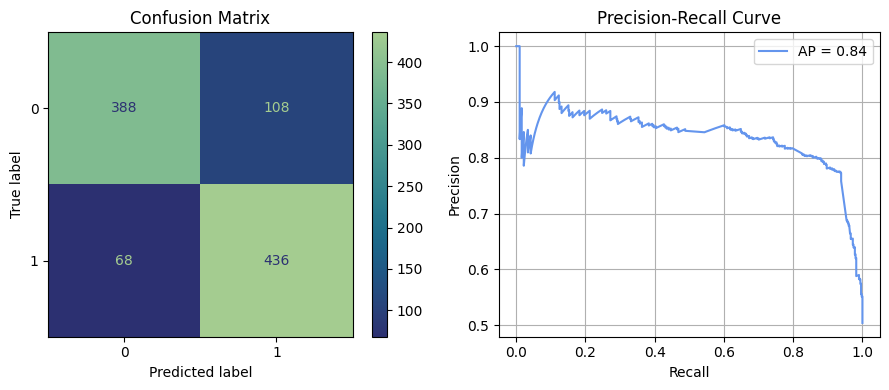

In [39]:
crb.plot_chrombert_eval(prediction_path='/content/pred_results.npy',dev_path='/content/dev_demo.tsv')

<br>

* 🧩 Attention Matrix: Let's take a look at how **ChromBERT** distributed attention across the sequences!


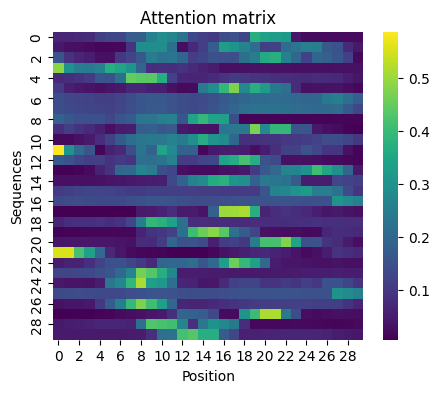

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(attention_mat[:30,:], cmap="viridis") # Visualize attention for the first 30 sequences; you can change the range to explore more or fewer entries
plt.title("Attention matrix")
plt.xlabel("Position")
plt.ylabel("Sequences");

<br>

🤔 Curious how "**high**" is high attention? Let's take a look at the attention score distribution to guide our threshold setting:

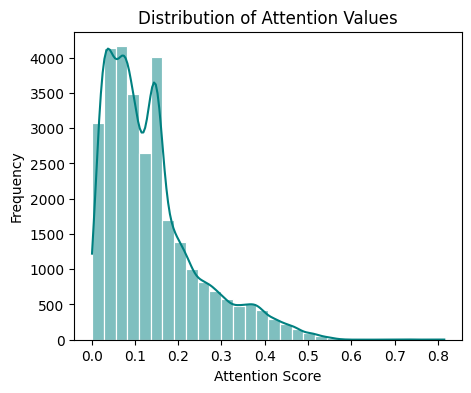

In [41]:
plt.figure(figsize=(5, 4))
sns.histplot(attention_mat.flatten(),bins=30,kde=True, color='teal', ec='white')
plt.xlabel("Attention Score")
plt.ylabel("Frequency")
plt.title("Distribution of Attention Values");

<br>

* 🎯 Based on the distribution, we'll define **high attention** as the top 7% of scores — these are the standout positions that **ChromBERT** really focused on.
We'll use the 93rd percentile as a threshold — but feel free to choose your own cutoff depending on how strict (or generous) you want to be! 😉

In [42]:
threshold = np.floor(np.percentile(attention_mat, 93) * 100) / 100
print(f"Threshold set at the 93rd percentile (floored): {threshold}")

Threshold set at the 93rd percentile (floored): 0.33


<br>

* 📊 With the `threshold` value you just set, we can now extract sequences that contain positions with attention scores above that threshold.
(📌 Note: This step is for visualization only — for actual motif discovery, you can simply run `motif_prom.sh` under `training/motif/prom`.)

* 💡 This function identifies where high attention scores appear in the matrix — it shows the row, position, score, and the corresponding sequence.
It's a great way to explore which parts of the sequence **ChromBERT** focused on most.

<br>

Matched no. 392: High attention at columns [20, 21, 22, 23, 24]
Scores: [0.33627597 0.45291554 0.33154291 0.41967245 0.38797966]
Sequence: EEEEDDDDDDDDDDDDDDDDDEEEEDDDDD




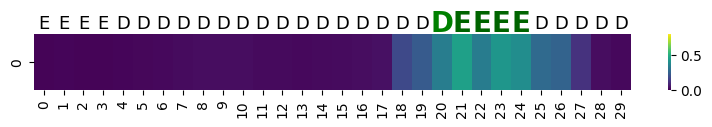


......................................................................

Matched no. 782: High attention at columns [4, 5, 6, 7, 8]
Scores: [0.34490503 0.35707678 0.35193129 0.35879569 0.34313758]
Sequence: IIIIIIIIIIOOOOOOOOOOOOOOOOO




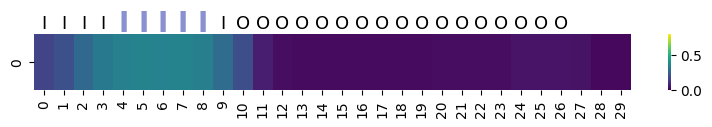


......................................................................

Matched no. 969: High attention at columns [1, 2, 3, 4, 5]
Scores: [0.34492619 0.42982724 0.36822163 0.4322742  0.34516681]
Sequence: EEEEEGOOOOOO




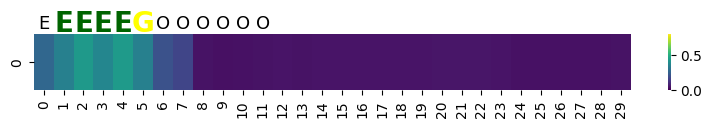


......................................................................



In [44]:
crb.prom_motif_vis_on_mat(dev_path='/content/dev_demo.tsv', atten_path='/content/atten.npy', target_len=30, threshold=0.33, fig_w=8, fig_h=1.5)

✅ That's it for exploring where **ChromBERT** is paying attention!

This visual inspection helps build intuition around what kinds of patterns the model might be focusing on — especially in sequences associated with highly expressed genes 🧬

Now that we've seen the attention scores in action, let's move on to the main event, motif clustering! 🔥

<br>


<a name="Motif-Clustering"></a>

## Motif Clustering

<br>



* 📥 Download the detected motif file `init_df.csv`

You can find your generated `init_df.csv` at `/training/motif/result`

In [45]:
# motif csv
!wget -O init_df.csv https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/init_concat.csv

--2025-05-16 08:52:51--  https://raw.githubusercontent.com/caocao0525/ChromBERT/chrombert-py311-extended/colab/colab_data/test_files/init_concat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5513 (5.4K) [text/plain]
Saving to: ‘init_df.csv’

init_df.csv         100%[===================>]   5.38K  --.-KB/s    in 0s      

2025-05-16 08:52:51 (48.3 MB/s) - ‘init_df.csv’ saved [5513/5513]



<br>

🏄 Before diving into the clustering process, let's take a quick look at the data.
Here's what each column in the result file represents:

* `motif`: The detected chromatin state motif
* `N`: Total number of sequences
* `K`: Number of positive sequences (e.g., those associated with highly expressed genes)
* `n`: Total number of times this motif appears across all sequences
* `x`: Number of times this motif appears in the positive sequences
* `p`: P-value measuring the statistical significance of the motif's enrichment in the positive set

In [47]:
import pandas as pd
init_df=pd.read_csv('/content/init_df.csv')
init_df.head(10)

,Unnamed: 0,motif,N,K,n,x,p
0,0,EEEEEE,1000,500,350,244,2.282236e-20
1,1,DDDEEE,1000,500,62,49,1.216714e-06
2,2,EEEEE,1000,500,387,271,2.645214e-24
3,3,BBGGG,1000,500,58,46,2.242258e-06
4,4,EEEEEEE,1000,500,306,212,2.632763e-16
5,5,AAAAA,1000,500,267,210,5.032911e-29
6,6,DEEEEE,1000,500,51,38,2.239695e-04
7,7,ABBBB,1000,500,58,51,4.372554e-10
8,8,EEEEEEEEE,1000,500,242,163,3.286223e-10
9,9,DEEEEEE,1000,500,45,35,8.950093e-05


<br>

🐬💦 Now we're ready to dive into motif clustering!

First, we'll create a matrix that serves as the foundational data structure for clustering.

You can generate it by running the following code:

In [48]:
df_sequences=crb.motif_init2df(input_path='/content/init_df.csv')

<br>

The created DataFrame contains the positions of chromatin states within each detected motif, with each column representing a motif instance. To apply DTW, chromatin states `A` to `O` have been numerically converted to values from `1` to `15`.

<br>

In [49]:
df_sequences

,position,0,1,2,3,4,5,6,7,8,...,106,107,108,109,110,111,112,113,114,115
0,Pos 1,5,4,5,2,5,1,4,1,5,...,7,3,7,2,1,6,6,1,2,1
1,Pos 2,5,4,5,2,5,1,5,2,5,...,2,3,7,2,1,6,6,1,2,1
2,Pos 3,5,4,5,7,5,1,5,2,5,...,1,3,2,1,1,4,3,1,1,1
3,Pos 4,5,5,5,7,5,1,5,2,5,...,1,3,1,1,1,4,3,1,1,1
4,Pos 5,5,5,5,7,5,1,5,2,5,...,1,3,1,1,1,4,3,1,1,1
5,Pos 6,5,5,<NA>,<NA>,5,<NA>,5,<NA>,5,...,1,6,1,<NA>,5,<NA>,<NA>,3,1,1
6,Pos 7,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,<NA>,5,...,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,3,<NA>,1
7,Pos 8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,...,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,3,<NA>,<NA>
8,Pos 9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>
9,Pos 10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>


<br>

🧶 To explore similarities among motifs, we use **Dynamic Time Warping (DTW)** to measure distances between chromatin state sequences and apply **agglomerative clustering** to build a dendrogram.

<br>

The arguments for the function below are:

* `categorical`:
  * If `True`, treats chromatin states as categorical labels—differences between any two distinct values are treated equally.

  * If `False`, treats values as numeric, so closer numbers (e.g., 1 and 2) are considered more similar than distant ones (e.g., 1 and 15).

* `fillna_method`: How to handle NaN values caused by padding shorter sequences. Use `ffill` to forward-fill or `0` to fill with zeros.

* `linkage_method`: The linkage criterion used in agglomerative clustering. Common options include `complete`, `average`, `ward`, etc. See [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) for details.

* `threshold`: The distance threshold for cutting the dendrogram to estimate the number of clusters. A higher value merges more branches; a lower value splits more finely.

DTW computation time: 10.7524 seconds


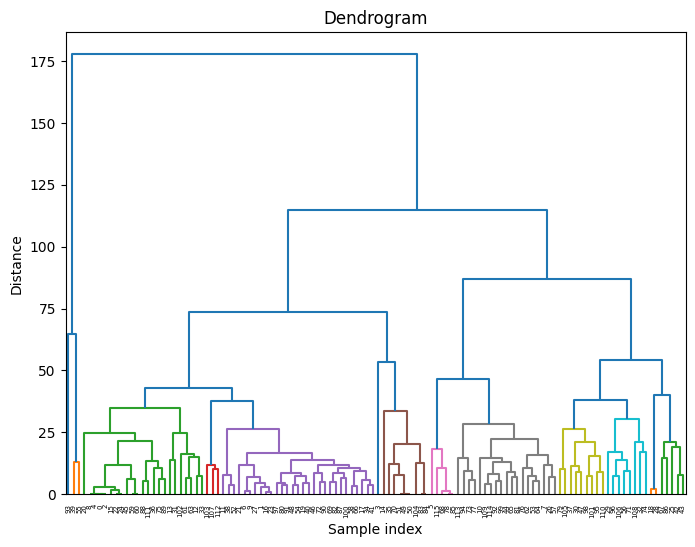

Estimated number of clusters: 13
Clustering Duration: 0:00:00.512584
Number of cluster estimated by dendrogram with designated threshold 35: [13] clusters
Min distance: 0.0
Max distance: 27.055498516937366
Median distance: 6.48074069840786


In [50]:
# dendrogram
y_pred= crb.motif_init2pred_with_dendrogram(input_path='/content/init_df.csv', categorical=False, fillna_method='ffill', linkage_method='complete', threshold=35)

<br>

🤔 **How does `thershold` work?**

Since the ideal number of clusters is unknown, the **dendrogram** provides a visual guide for estimating cluster structure. The threshold value (e.g., 35) controls how high we cut the tree 🪚🌲: a higher threshold results in fewer, larger clusters, while a lower threshold creates more, smaller clusters. This step is a preliminary guide for cluster selection before applying final clustering.

<br>

📊 **Clustering Output**: `y_pred`

The variable `y_pred` contains the predicted cluster labels for each motif, returned as a NumPy array. Each number corresponds to a cluster index assigned based on DTW-based agglomerative clustering.

<br>

In [51]:
y_pred

array([ 3,  5,  3,  7,  3,  8,  5,  9,  3,  5,  9,  5,  3,  3,  6,  3,  5,
        5, 12,  5,  3,  5,  3,  5,  3, 13,  9,  5, 12, 11, 10,  3, 11,  3,
        5,  6,  3, 10,  5,  1,  5,  5, 13, 13,  9,  3,  5, 10,  5,  6,  6,
        6,  5,  9,  5,  1, 11,  9,  5,  3,  3,  3,  9,  3,  9,  9,  5, 13,
        8,  5,  6, 11,  5,  9, 11,  3,  9,  9,  8, 10,  5,  9,  5,  6,  6,
        8, 13,  5,  3,  3,  5,  5,  9,  2,  9, 10, 11,  5, 10,  9,  5, 10,
        3,  4,  6, 10, 11,  4, 11,  9, 10,  3,  4,  9,  9,  8],
      dtype=int32)

<br>

**DTW Distance Matrix**

🏃‍➡️ If you want to quickly obtain the `dtw_distance_matrix` and `y_pred` after deciding on the number of clusters from the dendrogram, run `motif_init2pred_test` to generate them.


In [52]:
dtw_distance_matrix, y_pred=crb.motif_init2pred(input_path='/content/init_df.csv', categorical=False, fillna_method="ffill", n_clusters=11, linkage_method="complete")
dtw_distance_matrix

DTW computation time: 7.803940057754517 seconds
Clustering Duration: 0:00:00.002263


array([[ 0.        ,  1.73205081,  0.        , ..., 10.39230485,
        11.66190379, 13.85640646],
       [ 1.73205081,  0.        ,  1.73205081, ...,  9.        ,
        10.72380529, 13.07669683],
       [ 0.        ,  1.73205081,  0.        , ..., 10.39230485,
        11.66190379, 13.85640646],
       ...,
       [10.39230485,  9.        , 10.39230485, ...,  0.        ,
         2.82842712,  5.29150262],
       [11.66190379, 10.72380529, 11.66190379, ...,  2.82842712,
         0.        ,  1.41421356],
       [13.85640646, 13.07669683, 13.85640646, ...,  5.29150262,
         1.41421356,  0.        ]])

🎨 Also, if you're interested in how motifs group together based on similarity, this heatmap shows their DTW distances — darker areas mean more similar motifs, and the order reflects clustering structure.

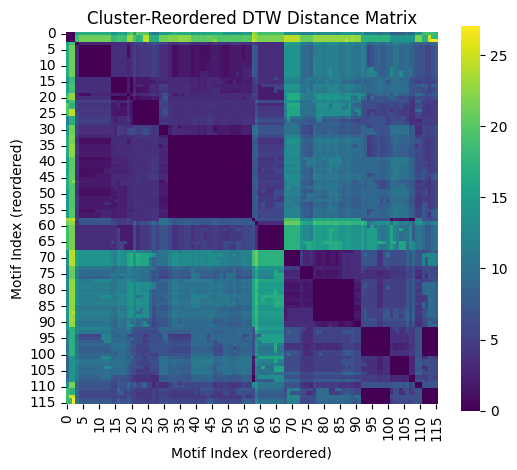

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.cluster.hierarchy import leaves_list, linkage, ClusterWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ClusterWarning)
    linkage_matrix = linkage(dtw_distance_matrix, method='complete')
    ordered_indices = leaves_list(linkage_matrix)
    reordered_matrix = dtw_distance_matrix[ordered_indices][:, ordered_indices]

plt.figure(figsize=(6, 5))
sns.heatmap(reordered_matrix, cmap='viridis', square=True)
plt.title('Cluster-Reordered DTW Distance Matrix')
plt.xlabel('Motif Index (reordered)')
plt.ylabel('Motif Index (reordered)')
plt.show()

Here, each value indicates the cluster assignment of a motif (i.e., the column in the input matrix). Motifs with the same number belong to the same cluster and are considered to share similar chromatin state transition patterns.



<br>

**🎨 Cluster Visualization**

This graph-based view shows how chromatin state motifs are grouped based on their similarity. Each node represents a motif, and motifs assigned to the same cluster are visualized together within a colored bubble. The letters show the chromatin state sequences, and their position in the layout reflects the result of similarity-based clustering.

The result image is automatically saved as `cluster_result.pdf`. You can view it by clicking the file icon on the left sidebar.

<br>

DTW computation time: 7.501561164855957 seconds
Clustering Duration: 0:00:00.002207
11


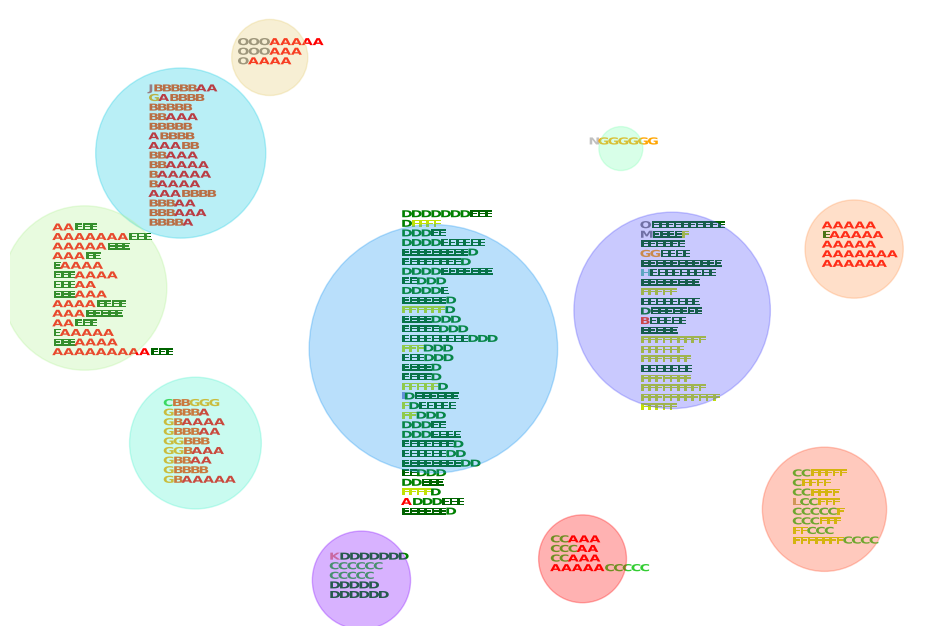

In [55]:
crb.motif_init2cluster_vis(input_path='/content/init_df.csv', categorical=False, n_clusters=11, fillna_method="ffill", linkage_method="complete", random_state=2, font_scale=0.0035,font_v_scale=10, fig_w=12, fig_h=8, node_size=1000, node_dist=0.05)

🔧 You can adjust the visualization parameters below to improve clarity or explore different clustering outcomes:

* Visualization Parameters Overview

  - `input_path`: Path to input motif CSV
  - `categorical`: Set to `True` for categorical comparison, `False` for numerical.
  - `n_clusters`: Number of clusters to form
  - `fillna_method`: Fill method for missing values (e.g., `"ffill"`)
  - `linkage_method`: Clustering method like `"complete"` or `"average"`
  - `random_state`: Controls layout reproducibility
  - `font_scale`: Controls motif letter size in nodes
  - `font_v_scale`: Adjusts vertical spacing of letters
  - `fig_w`, `fig_h`: Size of the entire figure
  - `node_size`: Base size of nodes
  - `node_dist`: Controls node spacing in the layout


<br><br>

**🎨 UMAP-Based Cluster Visualization**

To explore the overall structure of motif clusters in a more intuitive 2D layout, we use UMAP (Uniform Manifold Approximation and Projection). This reduces the high-dimensional DTW distance matrix to two dimensions while preserving meaningful relationships between motifs.

Each point represents a motif, and colors indicate the cluster assignments from agglomerative clustering. This plot helps you visually assess how distinct (or overlapping) the clusters are.

DTW computation time: 7.781802654266357 seconds
Clustering Duration: 0:00:00.001952


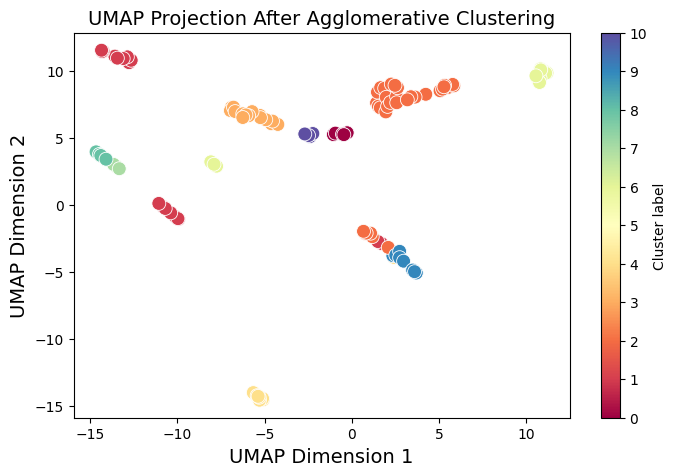

In [56]:
crb.motif_init2umap(input_path='/content/init_df.csv', categorical=False,  n_clusters=11, fillna_method="ffill", linkage_method="complete", n_neighbors=5, min_dist=0.3, random_state=2)

* 🔧 Key Parameters

  * `n_neighbors`: Controls how local or global the structure of the data is.
Smaller values emphasize local cluster shape; larger values highlight global patterns.

  * `min_dist`: Controls how tightly UMAP is allowed to pack points together.
Smaller values reveal finer substructures, while larger values spread out the clusters.

  * `n_clusters`: Number of clusters from hierarchical clustering (used for coloring).


<br><br>

----


<br><br>


**💫 Wrapping Up**

🥳 Congratulations on completing the tutorial! 🎉

You've now walked through the full pipeline — from data download and curation, to sequence preprocessing for pretraining, followed by fine-tuning, and finally visualizing motifs and their clustering.

This end-to-end workflow empowers you to explore chromatin state patterns in a structured and interpretable way.

Feel free to adjust parameters, test on your own datasets, or extend the pipeline with custom modules. Whether you're aiming for predictive modeling or biological insight, you're now equipped to take ChromBERT further.

Thanks for exploring with us — and happy clustering! 🧬✨


💮

<br>

-----